   id     V1     V2     V3     V4   V5     V6   V7     V8     V9  ...    V16  \
0   1  0.438  0.498  3.625  3.645  5.0  2.918  5.0  2.351  2.332  ...  0.593   
1   2  0.438  0.498  3.625  3.648  5.0  2.918  5.0  2.637  2.332  ...  0.592   
2   3  0.438  0.498  3.625  3.629  5.0  2.918  5.0  2.637  2.334  ...  0.593   
3   4  0.437  0.501  3.625  3.626  5.0  2.918  5.0  2.353  2.334  ...  0.593   
4   5  0.438  0.498  3.626  3.629  5.0  2.918  5.0  2.640  2.334  ...  0.592   

     V17    V18    V19    V20    V21    V22    V23    V24  Class  
0  0.502  0.493  0.504  0.445  0.431  0.444  0.440  0.429      4  
1  0.502  0.493  0.504  0.449  0.431  0.444  0.443  0.429      4  
2  0.502  0.493  0.504  0.449  0.431  0.444  0.446  0.429      4  
3  0.502  0.493  0.504  0.449  0.431  0.444  0.444  0.429      4  
4  0.502  0.493  0.504  0.449  0.431  0.444  0.441  0.429      4  

[5 rows x 26 columns]
Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12',

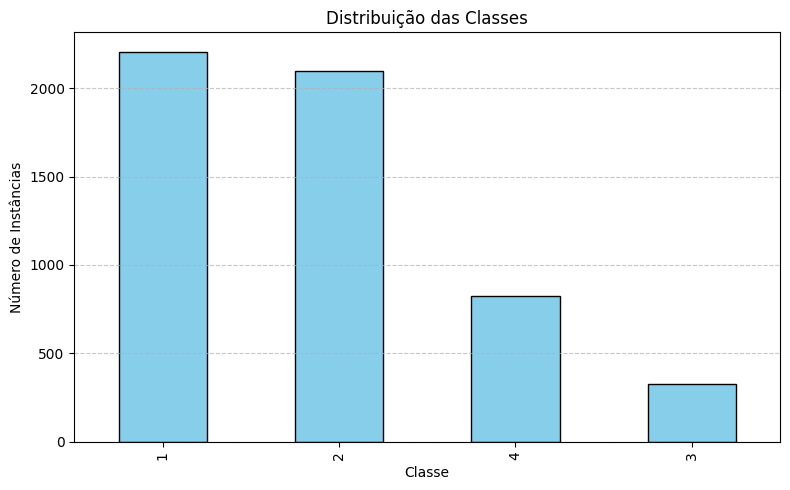

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/renan/Documents/Trab3/Robo.csv')
print(df.head())

# Verificar os nomes das colunas
print(df.columns)

# Suponha que a coluna de classe se chame 'target'
# Distribuição das classes
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

# Mostrar os dados em tabela
distribution_df = pd.DataFrame({
    'Número de Instâncias': class_counts,
    'Percentual (%)': class_percent.round(2)
})
print(distribution_df)

# Gerar gráfico de barras
plt.figure(figsize=(8,5))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição das Classes')
plt.xlabel('Classe')
plt.ylabel('Número de Instâncias')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
class KNNClassifier:
    def __init__(self, k=5, distance='euclidean', p=3):
        self.k = k
        self.distance = distance
        self.p = p  # Usado apenas para Minkowski

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def _compute_distance(self, x1, x2):
        if self.distance == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.distance == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        elif self.distance == 'minkowski':
            return np.sum(np.abs(x1 - x2) ** self.p) ** (1 / self.p)
        elif self.distance == 'chebyshev':
            return np.max(np.abs(x1 - x2))
        else:
            raise ValueError(f"Distância '{self.distance}' não suportada.")

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            distances = np.array([self._compute_distance(x, x_train) for x_train in self.X_train])

            k_nearest_indices = np.argsort(distances)[:self.k]

            k_nearest_labels = self.y_train[k_nearest_indices]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            y_pred.append(most_common)

        return np.array(y_pred)


In [74]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_l1=0.0, lambda_l2=0.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_l1 = lambda_l1
        self.lambda_l2 = lambda_l2
        self.weights = None
        self.bias = None
        self.classes_ = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        
        # Inicializa pesos e bias para cada classe (One-vs-Rest)
        self.weights = np.zeros((len(self.classes_), n_features))
        self.bias = np.zeros(len(self.classes_))

        for idx, cls in enumerate(self.classes_):
            y_binary = np.where(y == cls, 1, 0)
            w = np.zeros(n_features)
            b = 0

            for _ in range(self.epochs):
                linear_model = np.dot(X, w) + b
                y_predicted = self._sigmoid(linear_model)

                dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y_binary))
                db = (1 / n_samples) * np.sum(y_predicted - y_binary)

                dw += self.lambda_l2 * w
                dw += self.lambda_l1 * np.sign(w)

                w -= self.learning_rate * dw
                b -= self.learning_rate * db

            self.weights[idx, :] = w
            self.bias[idx] = b

        return self
        

    def predict_proba(self, X):
        linear_models = np.dot(X, self.weights.T) + self.bias
        return self._sigmoid(linear_models)

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]


In [79]:
from sklearn.feature_selection import SelectKBest, f_classif
# Carregamento do dataset
df = pd.read_csv('C:/Users/renan/Documents/Trab3/Robo.csv')
X_full = df.drop(columns=['id', 'Class'])
y = df['Class']

# Padronização manual
means = X_full.mean(axis=0)
stds = X_full.std(axis=0)
stds[stds == 0] = 1
X_full = (X_full - means) / stds

# Seleciona as top 10 variáveis com ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=10)
X_top10 = selector.fit_transform(X_full, y)


clf = KNNClassifier(k=3, distance='manhattan').fit(X_top10, y)
rl1 = LogisticRegression(learning_rate=0.1, lambda_l1=0.001, lambda_l2=0.001).fit(X_top10, y)

rl2 = LogisticRegression(learning_rate=0.001, epochs=2000, lambda_l1=0.5, lambda_l2=0.01).fit(X_top10, y)

In [34]:
# Obter os índices das colunas selecionadas no DataFrame original
selected_indices = selector.get_support(indices=True)

# Obter os nomes das colunas selecionadas (em ordem)
top10_headers = X_full.columns[selected_indices].tolist()

# Resultado
print("Headers/colunas do X_top10 em ordem:")
for idx, header in enumerate(top10_headers):
    print(f"Posição {idx} no X_top10: {header} (Índice original: {selected_indices[idx]})")

# Você também pode criar um DataFrame para visualização mais clara
import pandas as pd
top10_info = pd.DataFrame({
    'Posição_no_X_top10': range(10),
    'Header': top10_headers,
    'Índice_original': selected_indices,
    'F_score': selector.scores_[selected_indices]
})
print("\nTabela completa das features selecionadas:")
print(top10_info.sort_values('F_score', ascending=False))

Headers/colunas do X_top10 em ordem:
Posição 0 no X_top10: V1 (Índice original: 0)
Posição 1 no X_top10: V7 (Índice original: 6)
Posição 2 no X_top10: V9 (Índice original: 8)
Posição 3 no X_top10: V15 (Índice original: 14)
Posição 4 no X_top10: V17 (Índice original: 16)
Posição 5 no X_top10: V18 (Índice original: 17)
Posição 6 no X_top10: V19 (Índice original: 18)
Posição 7 no X_top10: V20 (Índice original: 19)
Posição 8 no X_top10: V23 (Índice original: 22)
Posição 9 no X_top10: V24 (Índice original: 23)

Tabela completa das features selecionadas:
   Posição_no_X_top10 Header  Índice_original     F_score
3                   3    V15               14  654.251351
7                   7    V20               19  347.463200
6                   6    V19               18  301.137412
9                   9    V24               23  226.003415
5                   5    V18               17  209.145612
4                   4    V17               16  208.298157
2                   2     V9           

In [51]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_knn_decision_boundary_2d(model, X, y, feature_indices=[3, 7], title=None):

    # Verificar se o modelo foi treinado
    if not hasattr(model, 'n_features_in_'):
        raise ValueError("O modelo precisa ser treinado primeiro")
    
    # Criar grid apenas para as 2 features selecionadas
    x_min, x_max = X[:, feature_indices[0]].min() - 1, X[:, feature_indices[0]].max() + 1
    y_min, y_max = X[:, feature_indices[1]].min() - 1, X[:, feature_indices[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Preparar dados para predição (preencher outras features com valores médios)
    grid_points = np.zeros((xx.ravel().shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        if i == feature_indices[0]:
            grid_points[:, i] = xx.ravel()
        elif i == feature_indices[1]:
            grid_points[:, i] = yy.ravel()
        else:
            grid_points[:, i] = np.median(X[:, i])
    
    # Fazer predições
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Configurar cores
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFA500'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FF8C00'])
    
    # Plotar
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    
    # Plotar pontos de treino
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X[y == cls, feature_indices[0]], 
                    X[y == cls, feature_indices[1]], 
                    c=[cmap_bold(idx)],
                    label=f'Classe {cls}',
                    edgecolor='k',
                    s=30)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(f'Feature V15')
    plt.ylabel(f'Feature V20')
    plt.title(title or f'Decision Boundary (k={model.n_neighbors}, {model.metric})')
    plt.legend()
    plt.show()


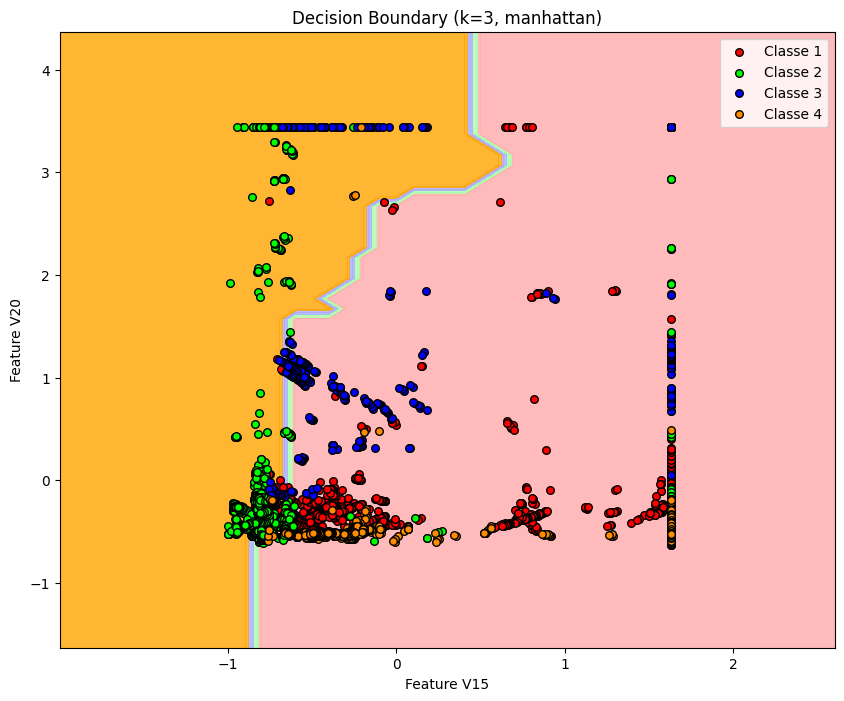

In [41]:
plot_knn_decision_boundary_2d(knn, X_top10, y, feature_indices=[3, 7])

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_custom_logistic_decision_boundary(model, X, y, feature_indices=[3, 7], title=None):

    # Verificação se o modelo foi treinado
    if model.weights is None:
        raise ValueError("O modelo precisa ser treinado primeiro (chame o método fit())")
    
    # Selecionar apenas 2 features para visualização
    X_2d = X[:, feature_indices]
    
    # Criar grid para o plot
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Preparar dados para predição (usando médias para outras features)
    grid_points = np.zeros((xx.ravel().shape[0], X.shape[1]))
    for i in range(X.shape[1]):
        if i == feature_indices[0]:
            grid_points[:, i] = xx.ravel()
        elif i == feature_indices[1]:
            grid_points[:, i] = yy.ravel()
        else:
            grid_points[:, i] = np.median(X[:, i])
    
    # Fazer predições (adaptado para sua implementação)
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Configurar cores
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFA500'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FF8C00'])
    
    # Plotar
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    
    # Plotar pontos de treino
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(X_2d[y == cls, 0], 
                    X_2d[y == cls, 1], 
                    c=[cmap_bold(idx)],
                    label=f'Classe {cls}',
                    edgecolor='k',
                    s=30)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(f'Feature V15')
    plt.ylabel(f'Feature V20')
    plt.title(title or 'Decision Boundary learning_rate=0.1, lambda_l1=0.001, lambda_l2=0.001')
    plt.legend()
    plt.show()

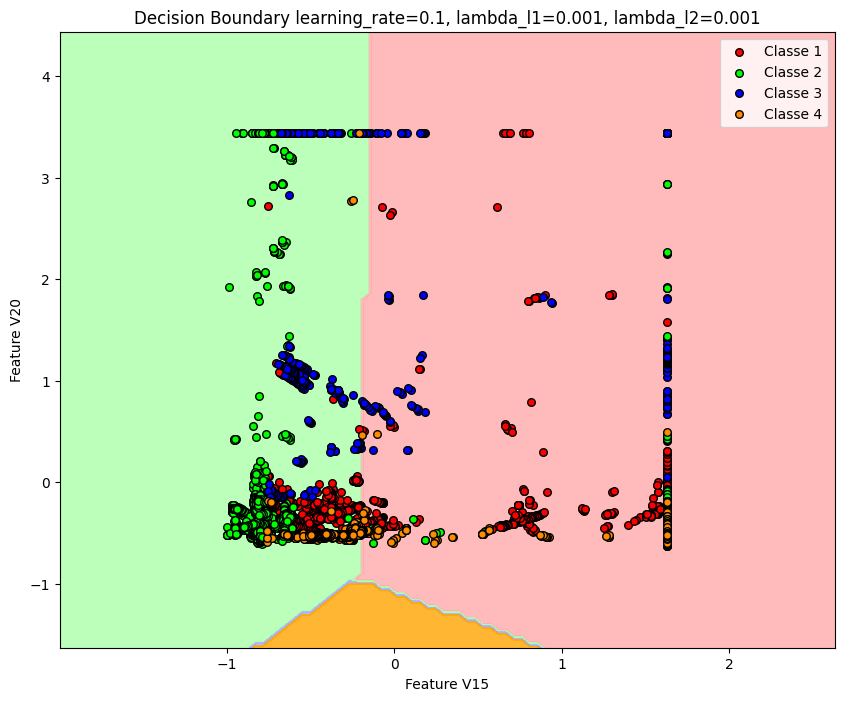

In [83]:
plot_custom_logistic_decision_boundary(rl1, X_top10, y, feature_indices=[3, 7])